# GRIP Internship
4.1. Stock Market Prediction using Numerical and Textual Analysis(Level - Advanced)
1. Create a hybrid model for stock price/performance prediction using numerical analysis 
   of historical stock prices, and sentimental analysis of news headlines
2. Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

# NUMERICAL ANALYSIS
## Step 1: Import libraries

In [1]:
import numpy as np
import datetime as dt
import pandas as pd 
import pandas_datareader.data as web 
import matplotlib.pyplot as plt
from matplotlib import style

## Step 2: Read BSE stock prices through web scraping data from yahoo

In [2]:
style.use('ggplot')
start = dt.datetime(2010,10,1)
end = dt.datetime(2020,10,1)
df = web.DataReader('^BSESN','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-10-01,20475.470703,20094.099609,20094.099609,20445.039062,19200.0,20445.039062
2010-10-04,20706.740234,20437.359375,20501.210938,20475.730469,15000.0,20475.730469
2010-10-05,20560.539062,20383.160156,20461.980469,20407.710938,17800.0,20407.710938
2010-10-06,20669.949219,20447.050781,20448.689453,20543.080078,16200.0,20543.080078
2010-10-07,20581.289062,20272.769531,20544.300781,20315.320312,19200.0,20315.320312


## Step 3: Plot a graph - OHLC prices vs time(in days)

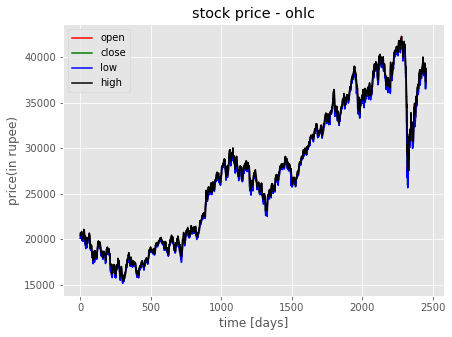

In [3]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df['Open'].values, color='red', label='open')
plt.plot(df['Close'].values, color='green', label='close')
plt.plot(df['Low'].values, color='blue', label='low')
plt.plot(df['High'].values, color='black', label='high')
plt.title('stock price - ohlc')
plt.xlabel('time [days]')
plt.ylabel('price(in rupee)')
plt.legend(loc='best')
plt.show()

## Step 4: Scale Closing price data over range 0 to 1

In [4]:
df1 = df.reset_index()['Close']

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

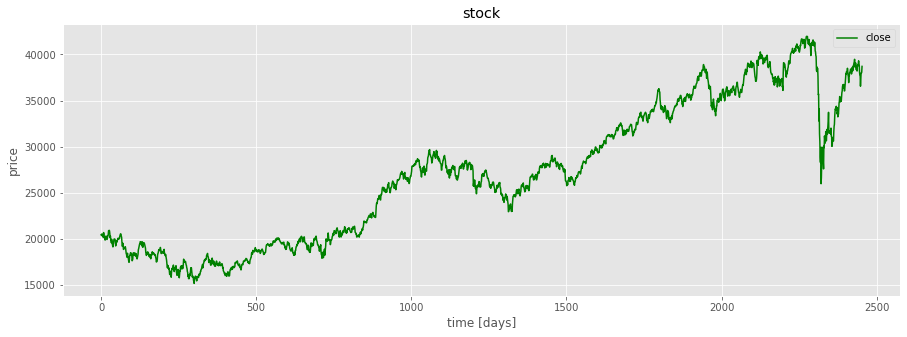

In [6]:
plt.figure(figsize=(15, 5));
plt.plot(df['Close'].values, color='green', label='close')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

## Step 5: Split data into train and test datasets

In [7]:
#splitting data into train and test sets
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [8]:
training_size,test_size

(1963, 491)

In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

## Step 6: Create samples and adding timestamps to the datasets

In [10]:
time_step= 250
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [11]:
print(X_train.shape), print(y_train.shape)

(1712, 250)
(1712,)


(None, None)

In [12]:
print(X_test.shape), print(y_test.shape)

(240, 250)
(240,)


(None, None)

In [13]:
# reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Step 7: Create a stacked LSTM Model 

In [14]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(250,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 250, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 250, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
27/27 [==============================] - 10s 371ms/step - loss: 0.0302 - val_loss: 0.0086
Epoch 2/100
27/27 [==============================] - 9s 323ms/step - loss: 0.0016 - val_loss: 0.0084
Epoch 3/100
27/27 [==============================] - 10s 353ms/step - loss: 7.5799e-04 - val_loss: 0.0083
Epoch 4/100
27/27 [==============================] - 9s 342ms/step - loss: 6.6847e-04 - val_loss: 0.0077
Epoch 5/100
27/27 [==============================] - 9s 323ms/step - loss: 6.4436e-04 - val_loss: 0.0075
Epoch 6/100
27/27 [==============================] - 8s 300ms/step - loss: 6.3228e-04 - val_loss: 0.0072
Epoch 7/100
27/27 [==============================] - 7s 277ms/step - loss: 6.0747e-04 - val_loss: 0.0071
Epoch 8/100
27/27 [==============================] - 8s 282ms/step - loss: 6.2210e-04 - val_loss: 0.0069
Epoch 9/100
27/27 [==============================] - 8s 278ms/step - loss: 6.2996e-04 - val_loss: 0.0068
Epoch 10/100
27/27 [==============================] - 7s 272m

27/27 [==============================] - 8s 280ms/step - loss: 1.9026e-04 - val_loss: 0.0011
Epoch 79/100
27/27 [==============================] - 7s 258ms/step - loss: 1.7609e-04 - val_loss: 0.0010
Epoch 80/100
27/27 [==============================] - 7s 262ms/step - loss: 1.6887e-04 - val_loss: 0.0011
Epoch 81/100
27/27 [==============================] - 7s 251ms/step - loss: 2.0947e-04 - val_loss: 0.0010
Epoch 82/100
27/27 [==============================] - 7s 249ms/step - loss: 1.8322e-04 - val_loss: 9.9842e-04
Epoch 83/100
27/27 [==============================] - 7s 250ms/step - loss: 1.7719e-04 - val_loss: 9.9891e-04
Epoch 84/100
27/27 [==============================] - 7s 251ms/step - loss: 1.8041e-04 - val_loss: 9.2708e-04
Epoch 85/100
27/27 [==============================] - 7s 251ms/step - loss: 2.0669e-04 - val_loss: 0.0010
Epoch 86/100
27/27 [==============================] - 7s 248ms/step - loss: 1.9079e-04 - val_loss: 0.0010
Epoch 87/100
27/27 [===========================

## Step 8: Predict results for the test set 

In [18]:
#predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [19]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## Step 9: Calculate error through performance evaluation metrics 

In [20]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

25953.160811466376

In [21]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

37197.717491906595

## Step 10: Plot the predicted results over actual results

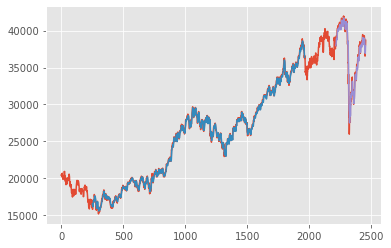

In [22]:
### Plotting 
# shift train predictions for plotting
look_back=250
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Step 11: Predict the closing price for the next 30 days

In [23]:
len(test_data)

491

In [24]:
x_input=test_data[241:].reshape(1,-1)
x_input.shape

(1, 250)

In [25]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [26]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps= 249
i=0
while(i<30):
    
    if(len(temp_input)>249):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.87731137 0.86379565 0.85638126 0.84018999 0.83491213 0.85903565
 0.8479237  0.85713589 0.86039946 0.87128997 0.87475924 0.89167902
 0.90087778 0.88838452 0.89193183 0.89049639 0.89190309 0.92079973
 0.92901674 0.93189899 0.93324267 0.93835627 0.93634972 0.94462347
 0.9514933  0.93916473 0.93996647 0.9314138  0.93777816 0.94040016
 0.93769267 0.94462041 0.95141496 0.94855926 0.9405017  0.96028769
 0.95775087 0.96519399 0.96928557 0.95672418 0.95703651 0.95230409
 0.95883343 0.95619319 0.94370357 0.94528255 0.93603783 0.94248695
 0.94880346 0.96478699 0.96213581 0.9775761  0.98528399 0.98959176
 0.98987623 0.9884243  0.98165003 0.97053998 0.98590281 0.98526269
 0.97390013 0.98782606 0.98177505 0.95234814 0.95954969 0.95761783
 0.98131728 0.98682067 0.99652928 1.         0.99701622 0.99925048
 0.99972896 0.98417634 0.97651688 0.96873314 0.97885428 0.9873238
 0.9702173  0.96318672 0.97184325 0.96120599 0.95409809 0.92231103
 0.95655876 0.96975195 0.97585299 0.96972175 0.9636

3 day output [[0.8594585]]
4 day input [0.83491213 0.85903565 0.8479237  0.85713589 0.86039946 0.87128997
 0.87475924 0.89167902 0.90087778 0.88838452 0.89193183 0.89049639
 0.89190309 0.92079973 0.92901674 0.93189899 0.93324267 0.93835627
 0.93634972 0.94462347 0.9514933  0.93916473 0.93996647 0.9314138
 0.93777816 0.94040016 0.93769267 0.94462041 0.95141496 0.94855926
 0.9405017  0.96028769 0.95775087 0.96519399 0.96928557 0.95672418
 0.95703651 0.95230409 0.95883343 0.95619319 0.94370357 0.94528255
 0.93603783 0.94248695 0.94880346 0.96478699 0.96213581 0.9775761
 0.98528399 0.98959176 0.98987623 0.9884243  0.98165003 0.97053998
 0.98590281 0.98526269 0.97390013 0.98782606 0.98177505 0.95234814
 0.95954969 0.95761783 0.98131728 0.98682067 0.99652928 1.
 0.99701622 0.99925048 0.99972896 0.98417634 0.97651688 0.96873314
 0.97885428 0.9873238  0.9702173  0.96318672 0.97184325 0.96120599
 0.95409809 0.92231103 0.95655876 0.96975195 0.97585299 0.96972175
 0.9636633  0.97249605 0.98555766

7 day output [[0.84465057]]
8 day input [0.86039946 0.87128997 0.87475924 0.89167902 0.90087778 0.88838452
 0.89193183 0.89049639 0.89190309 0.92079973 0.92901674 0.93189899
 0.93324267 0.93835627 0.93634972 0.94462347 0.9514933  0.93916473
 0.93996647 0.9314138  0.93777816 0.94040016 0.93769267 0.94462041
 0.95141496 0.94855926 0.9405017  0.96028769 0.95775087 0.96519399
 0.96928557 0.95672418 0.95703651 0.95230409 0.95883343 0.95619319
 0.94370357 0.94528255 0.93603783 0.94248695 0.94880346 0.96478699
 0.96213581 0.9775761  0.98528399 0.98959176 0.98987623 0.9884243
 0.98165003 0.97053998 0.98590281 0.98526269 0.97390013 0.98782606
 0.98177505 0.95234814 0.95954969 0.95761783 0.98131728 0.98682067
 0.99652928 1.         0.99701622 0.99925048 0.99972896 0.98417634
 0.97651688 0.96873314 0.97885428 0.9873238  0.9702173  0.96318672
 0.97184325 0.96120599 0.95409809 0.92231103 0.95655876 0.96975195
 0.97585299 0.96972175 0.9636633  0.97249605 0.98555766 0.98159504
 0.97404951 0.96650412 

11 day output [[0.8375424]]
12 day input [0.90087778 0.88838452 0.89193183 0.89049639 0.89190309 0.92079973
 0.92901674 0.93189899 0.93324267 0.93835627 0.93634972 0.94462347
 0.9514933  0.93916473 0.93996647 0.9314138  0.93777816 0.94040016
 0.93769267 0.94462041 0.95141496 0.94855926 0.9405017  0.96028769
 0.95775087 0.96519399 0.96928557 0.95672418 0.95703651 0.95230409
 0.95883343 0.95619319 0.94370357 0.94528255 0.93603783 0.94248695
 0.94880346 0.96478699 0.96213581 0.9775761  0.98528399 0.98959176
 0.98987623 0.9884243  0.98165003 0.97053998 0.98590281 0.98526269
 0.97390013 0.98782606 0.98177505 0.95234814 0.95954969 0.95761783
 0.98131728 0.98682067 0.99652928 1.         0.99701622 0.99925048
 0.99972896 0.98417634 0.97651688 0.96873314 0.97885428 0.9873238
 0.9702173  0.96318672 0.97184325 0.96120599 0.95409809 0.92231103
 0.95655876 0.96975195 0.97585299 0.96972175 0.9636633  0.97249605
 0.98555766 0.98159504 0.97404951 0.96650412 0.96047995 0.97648669
 0.97077747 0.94064436

15 day output [[0.83069396]]
16 day input [0.89190309 0.92079973 0.92901674 0.93189899 0.93324267 0.93835627
 0.93634972 0.94462347 0.9514933  0.93916473 0.93996647 0.9314138
 0.93777816 0.94040016 0.93769267 0.94462041 0.95141496 0.94855926
 0.9405017  0.96028769 0.95775087 0.96519399 0.96928557 0.95672418
 0.95703651 0.95230409 0.95883343 0.95619319 0.94370357 0.94528255
 0.93603783 0.94248695 0.94880346 0.96478699 0.96213581 0.9775761
 0.98528399 0.98959176 0.98987623 0.9884243  0.98165003 0.97053998
 0.98590281 0.98526269 0.97390013 0.98782606 0.98177505 0.95234814
 0.95954969 0.95761783 0.98131728 0.98682067 0.99652928 1.
 0.99701622 0.99925048 0.99972896 0.98417634 0.97651688 0.96873314
 0.97885428 0.9873238  0.9702173  0.96318672 0.97184325 0.96120599
 0.95409809 0.92231103 0.95655876 0.96975195 0.97585299 0.96972175
 0.9636633  0.97249605 0.98555766 0.98159504 0.97404951 0.96650412
 0.96047995 0.97648669 0.97077747 0.94064436 0.93758093 0.9229329
 0.91758138 0.86349237 0.857768

18 day output [[0.82454777]]
19 day input [0.93189899 0.93324267 0.93835627 0.93634972 0.94462347 0.9514933
 0.93916473 0.93996647 0.9314138  0.93777816 0.94040016 0.93769267
 0.94462041 0.95141496 0.94855926 0.9405017  0.96028769 0.95775087
 0.96519399 0.96928557 0.95672418 0.95703651 0.95230409 0.95883343
 0.95619319 0.94370357 0.94528255 0.93603783 0.94248695 0.94880346
 0.96478699 0.96213581 0.9775761  0.98528399 0.98959176 0.98987623
 0.9884243  0.98165003 0.97053998 0.98590281 0.98526269 0.97390013
 0.98782606 0.98177505 0.95234814 0.95954969 0.95761783 0.98131728
 0.98682067 0.99652928 1.         0.99701622 0.99925048 0.99972896
 0.98417634 0.97651688 0.96873314 0.97885428 0.9873238  0.9702173
 0.96318672 0.97184325 0.96120599 0.95409809 0.92231103 0.95655876
 0.96975195 0.97585299 0.96972175 0.9636633  0.97249605 0.98555766
 0.98159504 0.97404951 0.96650412 0.96047995 0.97648669 0.97077747
 0.94064436 0.93758093 0.9229329  0.91758138 0.86349237 0.85776856
 0.87568206 0.86768212

23 day output [[0.8149722]]
24 day input [0.9514933  0.93916473 0.93996647 0.9314138  0.93777816 0.94040016
 0.93769267 0.94462041 0.95141496 0.94855926 0.9405017  0.96028769
 0.95775087 0.96519399 0.96928557 0.95672418 0.95703651 0.95230409
 0.95883343 0.95619319 0.94370357 0.94528255 0.93603783 0.94248695
 0.94880346 0.96478699 0.96213581 0.9775761  0.98528399 0.98959176
 0.98987623 0.9884243  0.98165003 0.97053998 0.98590281 0.98526269
 0.97390013 0.98782606 0.98177505 0.95234814 0.95954969 0.95761783
 0.98131728 0.98682067 0.99652928 1.         0.99701622 0.99925048
 0.99972896 0.98417634 0.97651688 0.96873314 0.97885428 0.9873238
 0.9702173  0.96318672 0.97184325 0.96120599 0.95409809 0.92231103
 0.95655876 0.96975195 0.97585299 0.96972175 0.9636633  0.97249605
 0.98555766 0.98159504 0.97404951 0.96650412 0.96047995 0.97648669
 0.97077747 0.94064436 0.93758093 0.9229329  0.91758138 0.86349237
 0.85776856 0.87568206 0.86768212 0.86996496 0.83657922 0.76406804
 0.76640018 0.65738133

28 day output [[0.8069946]]
29 day input [0.94040016 0.93769267 0.94462041 0.95141496 0.94855926 0.9405017
 0.96028769 0.95775087 0.96519399 0.96928557 0.95672418 0.95703651
 0.95230409 0.95883343 0.95619319 0.94370357 0.94528255 0.93603783
 0.94248695 0.94880346 0.96478699 0.96213581 0.9775761  0.98528399
 0.98959176 0.98987623 0.9884243  0.98165003 0.97053998 0.98590281
 0.98526269 0.97390013 0.98782606 0.98177505 0.95234814 0.95954969
 0.95761783 0.98131728 0.98682067 0.99652928 1.         0.99701622
 0.99925048 0.99972896 0.98417634 0.97651688 0.96873314 0.97885428
 0.9873238  0.9702173  0.96318672 0.97184325 0.96120599 0.95409809
 0.92231103 0.95655876 0.96975195 0.97585299 0.96972175 0.9636633
 0.97249605 0.98555766 0.98159504 0.97404951 0.96650412 0.96047995
 0.97648669 0.97077747 0.94064436 0.93758093 0.9229329  0.91758138
 0.86349237 0.85776856 0.87568206 0.86768212 0.86996496 0.83657922
 0.76406804 0.76640018 0.65738133 0.70687577 0.60554423 0.5752584
 0.51141461 0.4897069  0

In [27]:
len(df1)

2454

In [28]:
len(df1)

day_new=np.arange(1,251)
day_pred=np.arange(251, 281)

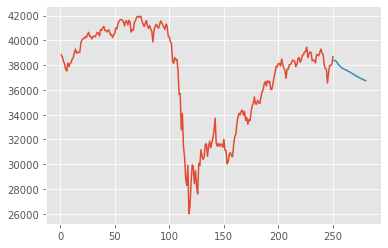

In [29]:
plt.plot(day_new,scaler.inverse_transform(df1[2204:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

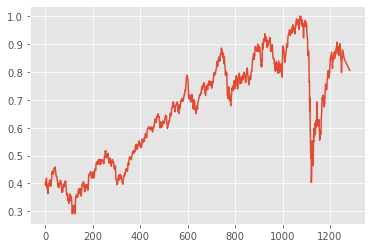

In [30]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [31]:
df3=scaler.inverse_transform(df3).tolist()

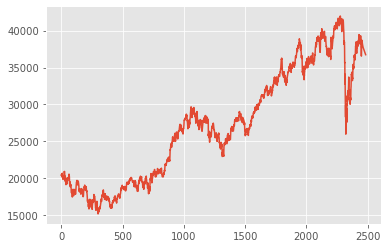

In [32]:
plt.plot(df3)


# Sentimental Analysis of news headlines

## Step 1: Import libraries

In [33]:
#Data Manipulation Library:
import pandas as pd

#Scientific computing library:
import numpy as np

#Plotting libraries:
import matplotlib.pyplot as plt
import seaborn as sb
#Text Analysis Libraries:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

## Step 2: Read csv file of news headlines

In [34]:
df=pd.read_csv('D:\stock data\india-news-headlines.csv', encoding = "ISO-8859-1")
df.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [36]:
df.describe()

,publish_date
count,3.297172e+06
mean,2.012470e+07
std,4.896213e+04
min,2.001010e+07
25%,2.009101e+07
50%,2.013071e+07
75%,2.016110e+07
max,2.020063e+07


In [37]:
df['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [38]:
#In case of null values
df.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [39]:
df['headline_text'].value_counts()

Sunny Leone HOT photos                                               98
Watch top news in one-minute                                         90
Official Site                                                        89
Football: Italian Serie A table                                      88
Football: Spanish La Liga table                                      86
                                                                     ..
Surat: Rs 500cr loan disbursal raises MSMEs' hopes                    1
Developers to get concessions for affordable housing in Ghaziabad     1
GMC gets six new consultants                                          1
UK to join US-led airstrikes against ISIS in Iraq                     1
Swachhta mascot Mahatma Gandhi's birthplace ranks lowly 225           1
Name: headline_text, Length: 3082589, dtype: int64

In [40]:
df['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
delhi-ncr                       7
ballot-talk                     7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

## Step 3: EDA (Exploratry Data Analysis) using NLP & NLTK tools

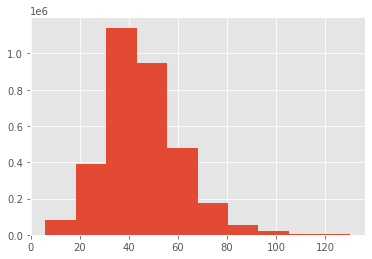

In [41]:
##find number of characters present in each sentence
df['headline_text'].str.len().hist()
plt.show()

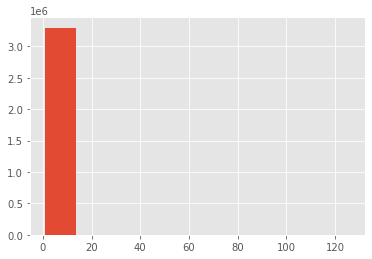

In [42]:
#number of words in each headline
df['headline_text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.show()

## Step 4: Create a corpus

In [43]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
corpus=[]
new= df['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

## Step 5: Creata a word count and store the occurrences of each word in a list of tuples

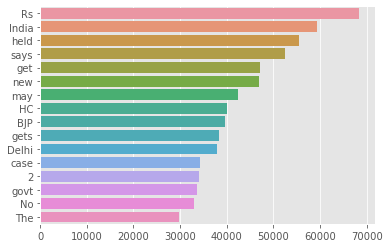

In [44]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sb.barplot(x=y,y=x)
plt.show()

## Step 6: Ngram exploration
### Ngrams are simply contiguous sequences of n words.

In [45]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

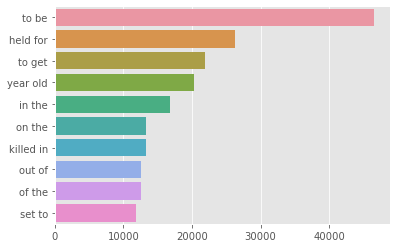

In [46]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(df['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sb.barplot(x=y,y=x)
plt.show()

## Step 7: TextBlob: to find the polarity of any headline

In [47]:
from textblob import TextBlob
TextBlob('100 people killed in Jammu').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df['polarity_score']=df['headline_text'].\
   apply(lambda x : polarity(x))
df['polarity_score'].hist()
plt.show()

In [ ]:
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df['polarity']=df['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(df.polarity.value_counts().index,df.polarity.value_counts())
plt.show()


In [ ]:
df[df['polarity']=='positive']['headline_text'].head()

In [ ]:
df[df['polarity']=='negative']['headline_text'].head()